# 2.2 Data Analysis: Tracker Distribution

In this notebook we start the analysis of the data. We also look at the tracker distribution of the web crawled data:

- Density
- Tracker Distribution
- Label Distribution


### Dataset Configuration

In [49]:
data_name = 'chrome-run-01'

### Set Up

In [50]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [52]:
import sys
# Append own directories to sys.path
references_path = os.path.join( '..', 'references')
visualization_path = os.path.join('..', 'src', 'visualization')
# Append paths to sys.path
sys.path.append(references_path)
sys.path.append(visualization_path)
# Import own modules
import visualize

For this analysis, we import the ```raw``` data from the csv file, label it and save it into the ```interim``` folder:

In [53]:
formatted_data_name = formatted_string = f"{data_name.split('-')[0].capitalize()} (Run {data_name.split('-')[2].zfill(2)})"

# Import and label the csv data
csv_file_path = os.path.join('..', 'data', 'raw', f"{data_name}.csv")
df = pd.read_csv(csv_file_path, index_col=False)

df['Label'] = (df['tracking'] >= 0.5).astype(int)
print(df.shape)
# print(df.columns)

# Save labeled data
save_path = os.path.join('..', 'data', 'interim', f"labeled-{data_name}.csv")
df.to_csv(save_path, index=False)

# Set color palette for labels
palette={0:'tab:blue', 1:'tab:red'}

(25338, 64)


### Tracker Distribution

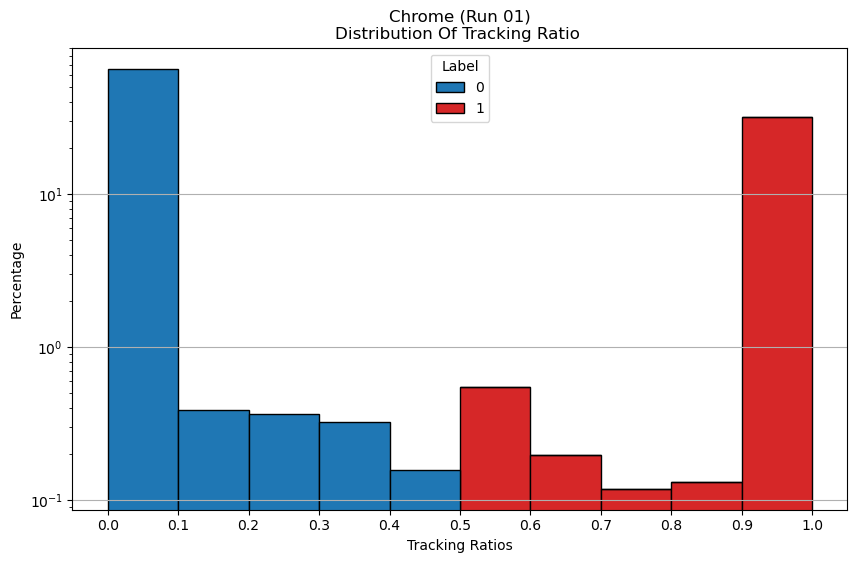

In [54]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tracking', hue='Label', stat='percent', binwidth=0.1, palette=palette, multiple='stack', alpha=1)
plt.xlabel('Tracking Ratios')
plt.ylabel('Percentage')
plt.yscale('log')
plt.title(f'{formatted_data_name}\nDistribution Of Tracking Ratio ')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y')

# Calculate percentages
total_count = len(df)
zero_tracking = len(df[df['tracking'] == 0])
between_zero_one_tracking = len(df[(df['tracking'] > 0) & (df['tracking'] < 1)])
one_tracking = len(df[df['tracking'] == 1])

percentages = {
    'tracking_ratio = 0': f'{(zero_tracking / total_count) * 100:.2f}%',
    '0 < tracking_ratio < 1': f'{(between_zero_one_tracking / total_count) * 100:.2f}%',
    'tracking_ratio = 1': f'{(one_tracking / total_count) * 100:.2f}%'
}

plt.show()

visualize.save_report_figure(fig, data_name, 'tracker_distribution')

In [55]:
# Create table overwiew
table_data = [[k, v] for k, v in percentages.items()]
pd.DataFrame(table_data, columns=['Tracking Ratio Range', 'Percentage'])

,Tracking Ratio Range,Percentage
0,tracking_ratio = 0,65.04%
1,0 < tracking_ratio < 1,3.32%
2,tracking_ratio = 1,31.64%


### Label Distribution

Label 0: 17023 nodes
Label 1: 8315 nodes


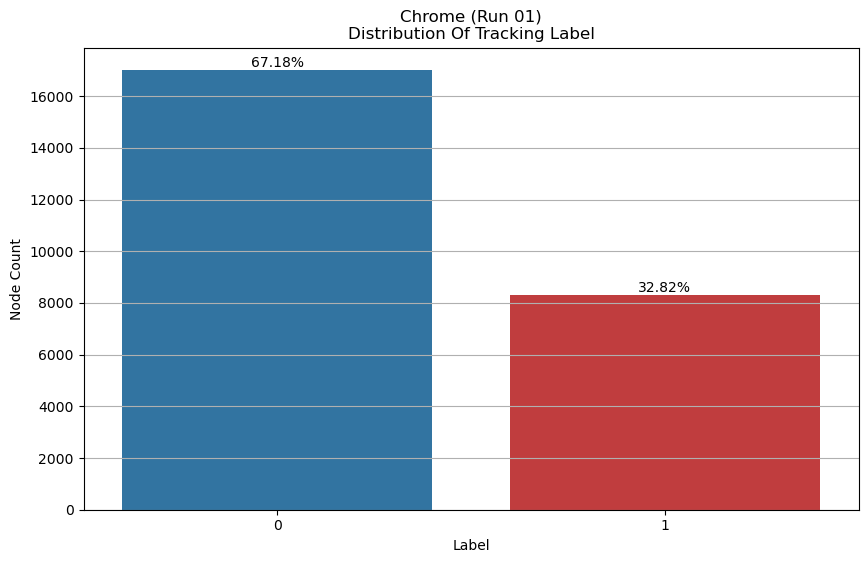

In [56]:
# Countplot need categorical pallette
palette = {'0': 'tab:blue', '1': 'tab:red'}

fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Label', data=df, palette=palette)
plt.xlabel('Label')
plt.ylabel('Node Count')
plt.title(f'{formatted_data_name}\nDistribution Of Tracking Label')
plt.grid(axis='y')

# Calculate the total number of observations
total = len(df['Label'])

# Calculate the counts of each label
label_counts = df['Label'].value_counts()

# Print the counts of each label
for label, count in label_counts.items():
    print(f"Label {label}: {count} nodes")

# Annotate the bars with the percentage of each label
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

visualize.save_report_figure(fig, data_name, 'label_distribution')